In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs

import sys
sys.path.append('/Users/clementinechazal/Documents/these/kernel_path')
import functions as fc

In [9]:
n = 300
d = 2

Mu = [-5*np.ones(2), 5*np.ones(2)]
Sigma = [np.identity(2), np.identity(2)]
p = [1/2, 1/2]

X1 =fc.mixt_gauss(Mu, Sigma, n, p)

# Mu = [3 * np.ones(2)]
# Sigma = [np.identity(d)]
# p = [1]
# X1 =fc.mixt_gauss(Mu, Sigma, n, p) # Samples from the target distribution pi_1, a mixture of 2 gaussians

In [18]:
sigma = 1
k = lambda x,y : fc.k_gauss(x,y,sigma)
dk = lambda x,y : fc.dk_gauss(x,y,sigma)
ddk = lambda x,y : fc.ddk_gauss(x,y,sigma)

# k = lambda x,y : fc.k_linear(x,y)
# dk = lambda x,y : fc.dk_linear(x,y)
# ddk = lambda x,y : fc.ddk_linear(x,y)

In the next cell we derive the vector field $v_t$ for $t = \tau,...,T= K\times \tau$ of the Ornstein Uhlenbeck marginals using the OU dynamics (Z) from the target $\pi_1$ to a gaussian $\gamma^d$. The particules noted X are not necessar to derive $v_t$, they only aim at checking that the dynamic induced by the vector fields $v_t$ reproduced OU process, which is not the case for the moment... 

iter0
iter5
iter10
iter15
iter20
iter25
iter30
iter35
iter40
iter45
iter50
iter55
iter60
iter65
iter70
iter75
iter80
iter85
iter90
iter95


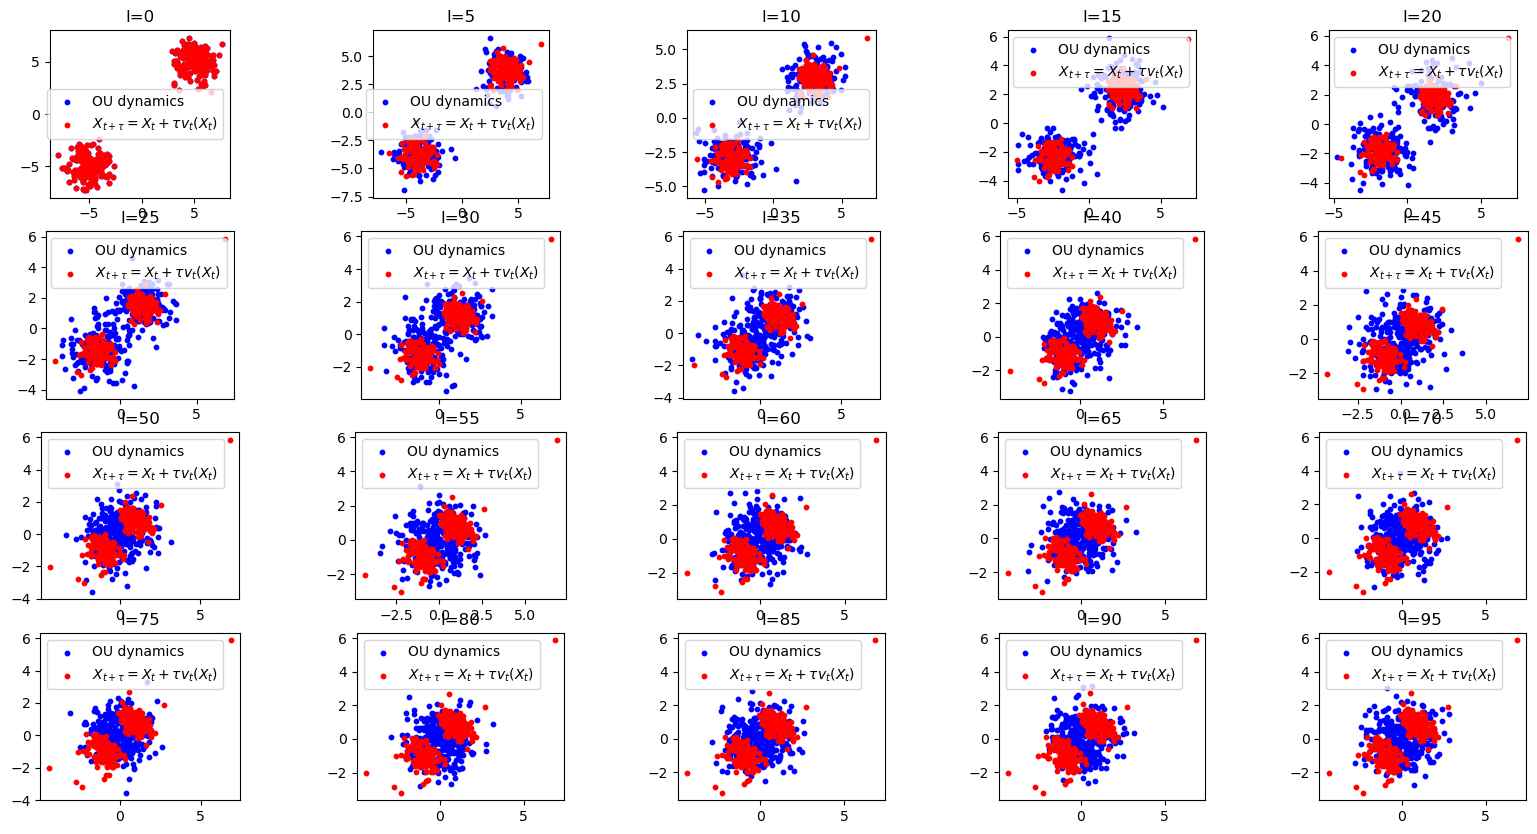

In [33]:
import functions as fc
import importlib
importlib.reload(fc)

V = []
N_iter = 100
t1 = 0.1
tau = 0.05
lambd = 1e-3
X = X1 
Z = X1
L1 = []
L2 = []
fig, axs = plt.subplots(nrows=2*N_iter//50, ncols=5, figsize=(20, 10))

xlim = (-4, 4)
ylim = (-4, 4)

for l in range(N_iter):
    t = l * tau + t1
     
    if l%5 == 0:
        print('iter'+str(l))
        ll = l//5
        ax = axs[ll//5, ll%5]
        Y = Z + tau*v(Z)
        #ax.scatter(Y[:, 0], Y[:, 1],color = "lightblue",s=10)
        ax.scatter(Z[:, 0], Z[:, 1],color = "blue", label = "OU dynamics",s=10) 
        ax.scatter(X[:, 0], X[:, 1],color = "red", label = r"$X_{t+\tau} = X_{t} + \tau v_t(X_{t})$",s=10)
        ax.set_title(f'l={l}')
        ax.set_aspect('equal')
        # ax.set_xlim(xlim)
        # ax.set_ylim(ylim)
        ax.legend()
    
    
    eps = np.random.randn(n, d)
    psi = fc.psi(X1, eps, t)
    sigma_t = np.sqrt(fc.sigma_2(t))

    Z = np.exp(-t) * X1 + sigma_t * eps #Ornstein-Uhlenbeck dynamics     
    Xi = fc.Xi(Z, eps, k, dk, ddk, t)
    phi = np.linalg.inv(1/n * Xi + lambd * np.identity(n)) @ psi
    score = -1 * eps / sigma_t
    #M1 = lambda x : k(Z, x)[:, :, None] * score[:,np.newaxis,:] + dk(Z, x)
    M = lambda x : k(x,Z)[:,:,None] * score[None,:,:] + np.transpose(dk(Z,x), (1,0,2))
    #v1 = lambda x : 1/n * np.sum(phi[:, np.newaxis, np.newaxis] * M1(x), axis=0)
    v = lambda x : 1/n * np.sum(phi[None, :, None] * M(x), axis=1)
    V.append(v)

    # L1.append(fc.Loss1(v,Z,Mu[0],phi,Xi,t,k,dk,sigma,lambd))
    # L2.append(fc.Loss2(v,Z,eps,Mu[0],phi,Xi,psi,t,k,dk,sigma,lambd))

    X = X + tau * v(X)


 

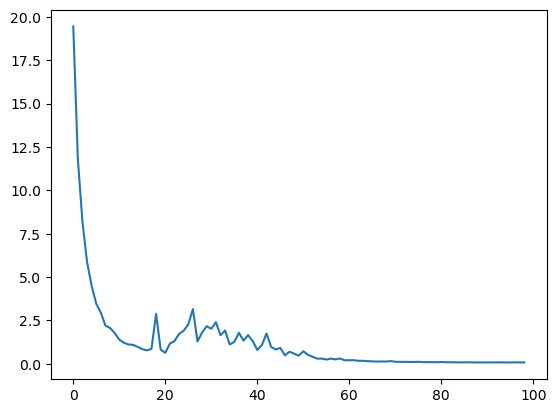

In [ ]:
# plt.figure()    
# #plt.plot(L1[1:]) # eq 3
# #plt.figure()
# plt.plot(L2[1:]) # eq 5
# plt.show()



In the next cell, we start form a set of particules $Y_j \sim \gamma^d$ and inverse OU process with the objective to recover a sample for $\pi_1$. I doesn't work yet. 

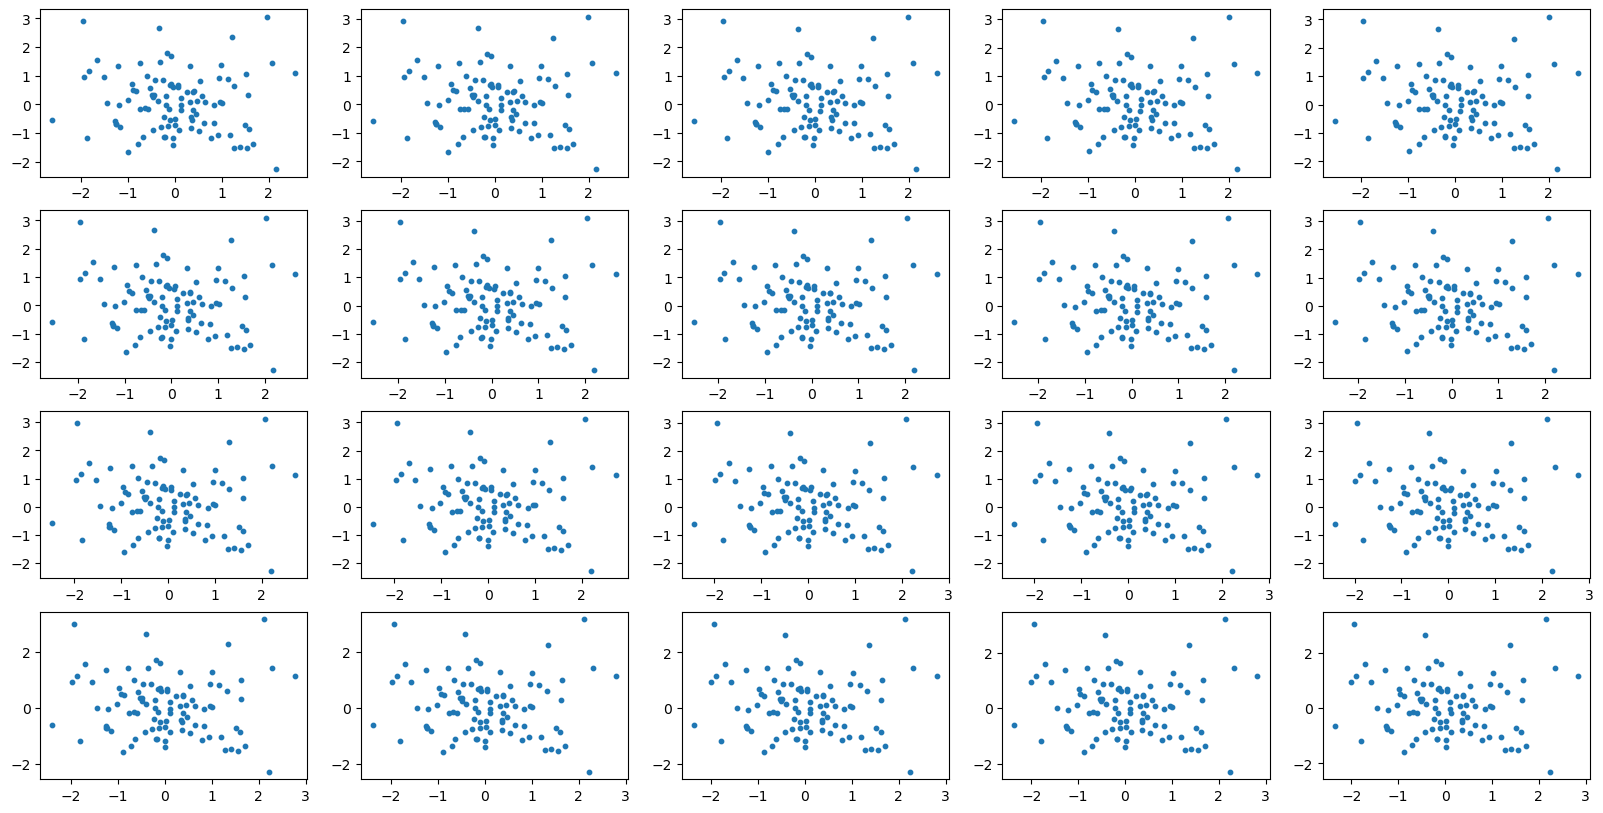

In [38]:
m = 100
Y = scs.multivariate_normal.rvs(np.zeros(d),np.identity(d),m)

fig, axs = plt.subplots(nrows=2*N_iter//50, ncols=5, figsize=(20, 10))

for i in range(N_iter):
    Y = Y - tau * V[N_iter-1-i](Y)
    #print(np.linalg.norm(V[N_iter-1-i](Y),axis = 1))
    #print(Y == Y - 1/tau * V[N_iter-1-i](Y))
    if i % 5 == 0:
        j = i//5
        ax = axs[j//5, j%5]
        ax.scatter(Y[:,0], Y[:,1], s=10)


#plt.scatter(Y[:,0], Y[:,1])
#plt.show()
